<a href="https://colab.research.google.com/github/dphi-official/Data_Science_Bootcamp/blob/master/Advanced_Material/Leaderboard_Plots/Leader_board_plots_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Leader Board Plots
---

Hey there. If you are curious how I made the two leaderboard plots that were shown in todays session, this short notebook is for you!

---
## Import Modules
---

First, we import the needed modules.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
## Import Data
---

Next, we import the data using pandas. For Excel data, it is important to select which sheet you want to work with.

Looking at the data types, it is visible that all columns were imported as "object", what we might want to change later.

In [ ]:
# week 0 (and 1 quiz from week 1)
df = pd.read_excel("dphi_leaderboard_1.xlsx", sheet_name=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   First name                          635 non-null    object
 1   Quiz: Week #0 - Day#0 Quiz (Real)   635 non-null    object
 2   Quiz: Week #0 - Day#1 Quiz (Real)   635 non-null    object
 3   Quiz: Week #0 - Day#2 Quiz (Real)   635 non-null    object
 4   Quiz: Week#0 - Day#3 - Quiz (Real)  635 non-null    object
 5   Quiz: Week #0 - Day#4 Quiz (Real)   635 non-null    object
 6   Quiz: Week #0 - Day#5 Quiz (Real)   635 non-null    object
 7   Quiz: Week #1 - Day#1 Quiz (Real)   635 non-null    object
 8   Course total (Real)                 635 non-null    object
 9   Coach                               635 non-null    object
 10  Group ID                            635 non-null    object
dtypes: object(11)
memory usage: 54.7+ KB


In [ ]:
df.head()

,First name,Quiz: Week #0 - Day#0 Quiz (Real),Quiz: Week #0 - Day#1 Quiz (Real),Quiz: Week #0 - Day#2 Quiz (Real),Quiz: Week#0 - Day#3 - Quiz (Real),Quiz: Week #0 - Day#4 Quiz (Real),Quiz: Week #0 - Day#5 Quiz (Real),Quiz: Week #1 - Day#1 Quiz (Real),Course total (Real),Coach,Group ID
0,Ahamed,10,10,8,9,10,10,10,67,Manish Kumar Chaudhary,AB_G1
1,Toshi,10,10,10,9,10,9.09,-,58.09,Manish Kumar Chaudhary,AB_G1
2,Abhishek,-,-,-,-,-,-,-,-,Manish Kumar Chaudhary,AB_G1
3,Abinaya,-,-,-,-,-,-,-,-,Manish Kumar Chaudhary,AB_G1
4,Akhil Reddy,10,10,9,9,10,8.18,10,66.18,Manish Kumar Chaudhary,AB_G1


---
## Transform Data
---

Because the original column names are very long and contain spaces, we replace them with shorter ones. You can just create a list and assign it to the "columns" attribute of the data frame. 

An alternative would be to use a dictionary and the df.rename() method. This is especially handy if you only want to rename a subset of the columns, so keep that in mind!

In [ ]:
# change column names
col_names = ["name", "week_0_quiz_0", "week_0_quiz_1", "week_0_quiz_2",
             "week_0_quiz_3", "week_0_quiz_4", "week_0_quiz_5", "week_1_quiz_1",
             "total", "coach", "id"]
df.columns = col_names

Because we only want the leader board for one group, we subset the data.

In [ ]:
# filter for ab_g13
df = df[df.id == "AB_G13"]

In [ ]:
df.head()

,name,week_0_quiz_0,week_0_quiz_1,week_0_quiz_2,week_0_quiz_3,week_0_quiz_4,week_0_quiz_5,week_1_quiz_1,total,coach,id
127,Amaan Ali,4,5.5,5,7,7,8.64,7,44.14,Pascal Wiltschko,AB_G13
128,Alekhya,10,10,10,10,9,-,-,49,Pascal Wiltschko,AB_G13
129,Amim Fatmi,-,-,-,-,-,-,-,-,Pascal Wiltschko,AB_G13
130,Chen Qiusong,-,-,-,-,-,-,-,-,Pascal Wiltschko,AB_G13
131,Chin Khee Hung,-,-,-,-,-,-,-,-,Pascal Wiltschko,AB_G13


Also, we realize that missing values were entered as "-" characters. This is also the reason why all dtypes were imported as "object". Replacing them with numpy's NaN solves this and we now have more appropriate dtypes.

In [ ]:
# replace "-" by NAN
df = df.replace("-", np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 127 to 158
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           32 non-null     object 
 1   week_0_quiz_0  14 non-null     float64
 2   week_0_quiz_1  12 non-null     float64
 3   week_0_quiz_2  10 non-null     float64
 4   week_0_quiz_3  9 non-null      float64
 5   week_0_quiz_4  8 non-null      float64
 6   week_0_quiz_5  7 non-null      float64
 7   week_1_quiz_1  3 non-null      float64
 8   total          14 non-null     float64
 9   coach          32 non-null     object 
 10  id             32 non-null     object 
dtypes: float64(8), object(3)
memory usage: 3.0+ KB


Let's look at the a table of the leader board before plotting it! We first filter for positive scores and the required columns and then sort by the total score. To make the index start from zero we reset it.

In [ ]:
# get leader list
leaderboard_list = (df.loc[df["total"] > 0, ["name", "total"]]
                    .sort_values("total", ascending=False)
                    .reset_index(drop=True))
print(leaderboard_list)

                   name  total
0                 Rajas  63.23
1          JAYASURYA  M  58.55
2        Imanina  Zaaim  58.14
3      Prince  Varshney  55.18
4               Alekhya  49.00
5      Teoh  Lynn  Jing  48.32
6            Amaan  Ali  44.14
7                  Noel  40.91
8         Nikhil  Ranga  35.50
9                Violet  25.00
10    Eghosa  Uwoghiren  16.50
11            Oluwaseyi  16.50
12    Praful  Dhanavade   8.00
13  Sudha  Vaishnavi  T   5.00


Now, it is almost time to create the plots. Looking at the seaborn documentation on how to create a heatmap, we realize that a specific layout is required. It involves the names on the y-axis as index and names on the x-axis as columns. The values we want to use in the heatmap are the only ones we should keep in the data frame.

Below, we again filter for positive scores, sort by the total score, drop columns we do not need and eventually, we replace the index by the name column.

In [ ]:
# heatmap df
df_heatmap = (df[df["total"] > 0]
              .sort_values("total", ascending=False)
              .drop(["total", "coach", "id"], axis=1)
              .set_index("name"))

In [ ]:
df_heatmap.head()

,week_0_quiz_0,week_0_quiz_1,week_0_quiz_2,week_0_quiz_3,week_0_quiz_4,week_0_quiz_5,week_1_quiz_1
name,,,,,,,
Rajas,10.0,10.0,9.0,9.0,9.0,7.73,8.5
JAYASURYA M,10.0,9.0,10.0,10.0,10.0,9.55,NaN
Imanina Zaaim,10.0,9.5,10.0,10.0,10.0,8.64,NaN
Prince Varshney,9.0,9.0,10.0,10.0,9.0,8.18,NaN
Alekhya,10.0,10.0,10.0,10.0,9.0,NaN,NaN


---
## Visualization 
---

Now, we initialize both figure and axis objects we use to make the plot. We want a subplot with one row and two columns and a certain size so that everything is clearly visible.

If this way of specifying a matplotlib plot is unfamiliar to you, please check out: https://matplotlib.org/3.2.1/tutorials/introductory/lifecycle.html.

For the heatmap, we select the colormap to be "BuGn" and specify that NaN values should get the color "lightgray". Then we set up the plot using sns.heatmap() using the df we created earlier and select that the numbers should also be included in the rectangles by setting annot=True.

Also remember that if we use the object oriented API of matplotlib, we have to use the "ax" object to make changes to the plot. In the seaborn call, we also have to select on which of the two axes of the subplot we want to draw the graph. In our case, the left one is ax[0] and the right one is ax[1]. We then rotate the ticks to make them more readable and set a title.

Finally, we also create the barchart that displays the total counts. We add annotations containing the total scores next to the bars by iterating over the ax object. If this looks complicated to you, remember that you can just copy it for your own plots for now and come back to it once you have explored the library more. To avoid labels that are cut-off, we increase the limits on the x-axis.

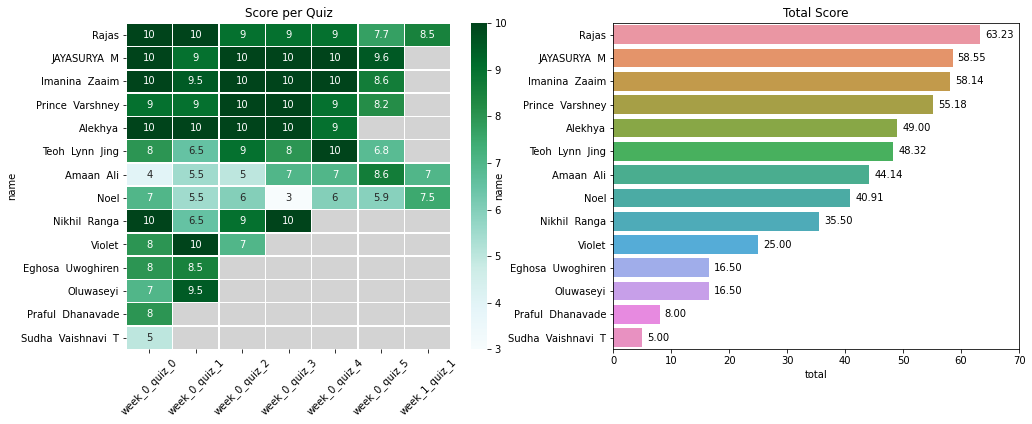

In [ ]:
# initialize plot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# heatmap
plt.cm.get_cmap(name="BuGn").set_bad("lightgray")
heatmap = sns.heatmap(df_heatmap, cmap="BuGn", annot=True, linewidths=.5, ax=ax[0])
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
ax[0].set_title("Score per Quiz")
# bar chart
sns.barplot(x="total", y="name", data=leaderboard_list, ax=ax[1])
ax[1].set_xlim(0, 70)
ax[1].set_title("Total Score")
for p in ax[1].patches:
    ax[1].annotate("{0:.2f}".format(p.get_width()),
                   xy=(p.get_width(), p.get_y() + p.get_height() / 2),
                   xytext=(5, 0),
                   textcoords='offset points',
                   ha="left",
                   va="center")
plt.show()

Please send me a message on Slack if there are any questions and happy coding! :-)